In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import pickle

In [16]:
## Import Data and split input (x) and output (y) data
df = pd.read_csv('reduced_data.csv')

# List of possible outputs to train for:
# Ts_R	ED_R	TS_R	SF_R	BD_FB	60ASTM	Fw_FB

# Use 80% of data as train and 20% as test
X_train, X_test, y_train, y_test = \
    train_test_split(df[df.columns[:3]], df['Ts_R'], test_size=0.2, random_state=12)
# X_train = df[df.columns[:3]][:40]
# y_train = df[df.columns[3]][:40]
# X_test = df[df.columns[:3]][40:]
# y_test = df[df.columns[3]][40:]

In [17]:
# define the model
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=0)
# evaluate the model
model.fit(X_train, y_train)

##### Not doing CV becuase random forest essentially does this for us.
#cross validation
#n_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, error_score='raise')
# report performance
#print('RMSE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
#####


RandomForestRegressor(n_jobs=-1)

In [18]:
# evaluate model using test set
pred = model.predict(X_test)
mae = sklearn.metrics.mean_absolute_error(y_test, pred)
print('MAE: %.3f' % (mae))

MAE: 0.105


<AxesSubplot: xlabel='Ts_R', ylabel='Count'>

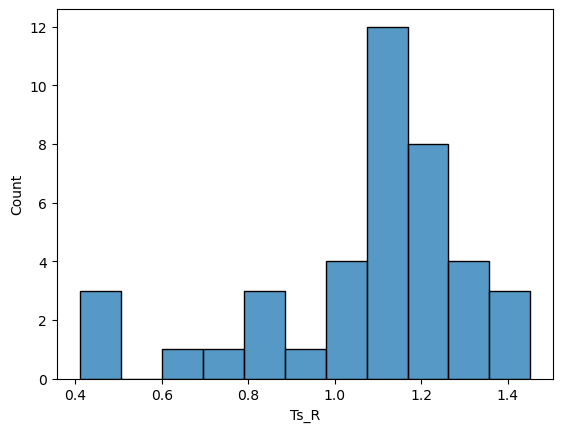

In [7]:
sns.histplot(y_train)

In [8]:
# Save model
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [9]:
model.predict(X_test)

array([1.1008    , 1.26702444, 0.877415  , 1.12895556, 1.12325222,
       1.00531944, 1.30481111, 1.11829444, 0.87781   , 1.199925  ,
       1.19851944])